In [16]:
import pandas as pd
import numpy as np

In [17]:
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('dataset/Mall_customers.csv')

In [19]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
df.shape

(200, 5)

In [21]:
df = df.iloc[:, [3,4]].values

In [22]:
df

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

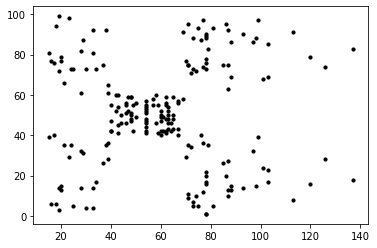

In [23]:
plt.scatter(df[:, 0], df[:, 1], s = 10, c = 'black')

In [24]:
from sklearn.cluster import KMeans

C:\Users\hisan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 0, 'No:of Clusters')

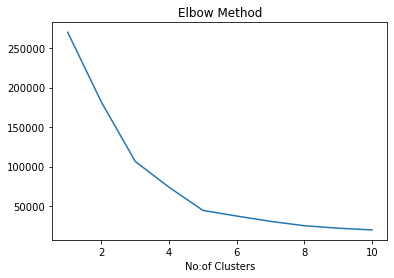

In [25]:
cluster_scores = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters= i,
    init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(df)
    cluster_scores.append(kmeans.inertia_)
plt.plot(range(1, 11), cluster_scores)
plt.title('Elbow Method')
plt.xlabel("No:of Clusters")

In [26]:
from sklearn.cluster import DBSCAN

In [27]:
dbscan = DBSCAN(eps=5, min_samples=5)

In [28]:
labels = dbscan.fit_predict(df)

In [29]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

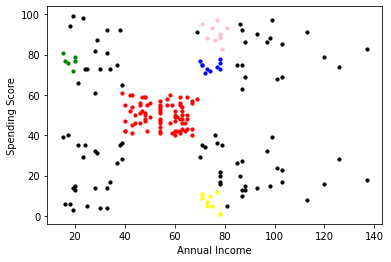

In [30]:
plt.scatter(df[labels==-1, 0], df[labels==-1, 1], s = 10, c = 'black')
plt.scatter(df[labels==0, 0], df[labels==0, 1], s = 10, c = 'green')
plt.scatter(df[labels==1, 0], df[labels==1, 1], s = 10, c = 'red')
plt.scatter(df[labels==2, 0], df[labels==2, 1], s = 10, c = 'blue')
plt.scatter(df[labels==3, 0], df[labels==3, 1], s = 10, c = 'yellow')
plt.scatter(df[labels==4, 0], df[labels==4, 1], s = 10, c = 'pink')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()